In [ ]:
#display_fargo3d_output.ipynb
#
#by Joe Hahn
#joe.hahn@oracle.com
#11 March 2022
#
#display results from a fargo3d simulation

In [ ]:
#get start time
import time as tm
clock_start = tm.time()

In [3]:
#import usual plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
#import seaborn as sns
color_seq = plt.rcParams['axes.prop_cycle'].by_key()['color']
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
np.set_printoptions(threshold=200)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
class Parameters(object):
    """
    Class for reading the simulation parameters.
    input: string -> name of the parfile, normally variables.par
    """
    def __init__(self, paramfile):
        try:
            params = open(paramfile,'r') #Opening the parfile
        except IOError:                  # Error checker.
            print  (paramfile + " not found.")
            return
        lines = params.readlines()     # Reading the parfile
        params.close()                 # Closing the parfile
        par = {}                       # Allocating a dictionary
        for line in lines:             #Iterating over the parfile
            name, value = line.split() #Spliting the name and the value (first blank)
            try:
                float(value)           # First trying with float
            except ValueError:         # If it is not float
                try:
                    int(value)         #                   we try with integer
                except ValueError:     # If it is not integer, we know it is string
                    value = '"' + value + '"'
            par[name] = value          # Filling the dictory
        self._params = par             # A control atribute, actually not used, good for debbuging
        for name in par:               # Iterating over the dictionary
            exec("self."+name.lower()+"="+par[name]) #Making the atributes at runtime

In [5]:
#get simulation parameters
par_file = 'variables.par'
P = Parameters(par_file)
print (P.nx, P.ny, P.omegaframe, P.outputdir, P.sigmaslope, P.sigma0)

1536 512 1.0005 ./outputs/fargo/ 0 0.00063661977237


In [6]:
#display all sim parameters
P._params

{'ALPHA': '0',
 'ASPECT': '"auto"',
 'ASPECTRATIO': '0.05',
 'AUTOCOLOR': '1',
 'CFL': '0.44',
 'CMAP': '"magma"',
 'COLORBAR': '1',
 'COORDINATES': '"cylindrical"',
 'CS': '1',
 'DAMPINGZONE': '1.15',
 'DT': '0.314159265359',
 'ECCENTRICITY': '0',
 'ETA': '0',
 'EXCLUDEHILL': '0',
 'FIELD': '"gasdens"',
 'FLARINGINDEX': '0',
 'FRAME': '"G"',
 'FUNCARCHFILE': '"std/func_arch.cfg"',
 'GAMMA': '1.66666667',
 'INCLINATION': '0',
 'INDIRECTTERM': '1',
 'KILLINGBCCOLATITUDE': '-0.2',
 'MASSTAPER': '0',
 'NINTERM': '50',
 'NOISE': '0',
 'NSNAP': '0',
 'NTOT': '5000',
 'NU': '1e-05',
 'NX': '1536',
 'NY': '512',
 'NZ': '1',
 'OMEGAFRAME': '1.0005',
 'OORTA': '-0.75',
 'ORBITALRADIUS': '0',
 'OUTPUTDIR': '"./outputs/fargo/"',
 'PERIODICY': '0',
 'PERIODICZ': '0',
 'PLANETCONFIG': '"planets/jupiter.cfg"',
 'PLANETHEATING': '0',
 'PLANETMASS': '0',
 'PLOTLINE': '"field[:,:,0]"',
 'PLOTLOG': '1',
 'REALTYPE': '"float64"',
 'RELEASEDATE': '0',
 'RELEASERADIUS': '0',
 'RESONANCE': '0.5',
 'ROCHESMO

In [7]:
#generate time axis
times = P.dt*np.arange(0, P.ntot + 1, int(P.ninterm))
N_times = len(times)
print ('number of times = ', N_times)
times

number of times =  101


array([   0.        ,   15.70796327,   31.41592654,   47.1238898 ,
         62.83185307,   78.53981634,   94.24777961,  109.95574288,
        125.66370614,  141.37166941,  157.07963268,  172.78759595,
        188.49555922,  204.20352248,  219.91148575,  235.61944902,
        251.32741229,  267.03537556,  282.74333882,  298.45130209,
        314.15926536,  329.86722863,  345.57519189,  361.28315516,
        376.99111843,  392.6990817 ,  408.40704497,  424.11500823,
        439.8229715 ,  455.53093477,  471.23889804,  486.94686131,
        502.65482457,  518.36278784,  534.07075111,  549.77871438,
        565.48667765,  581.19464091,  596.90260418,  612.61056745,
        628.31853072,  644.02649399,  659.73445725,  675.44242052,
        691.15038379,  706.85834706,  722.56631033,  738.27427359,
        753.98223686,  769.69020013,  785.3981634 ,  801.10612667,
        816.81408993,  832.5220532 ,  848.23001647,  863.93797974,
        879.64594301,  895.35390627,  911.06186954,  926.76983

In [8]:
#read final snapshot of gas density
idx = N_times - 1
file = "gasdens{0:d}.dat".format(idx)
print ('file = ', file)
print ('number of float64 = ', np.fromfile(file, dtype='float64').shape)
rho = np.fromfile(file, dtype='float64').reshape(P.ny, P.nx) 
print ('rho.shape = ', rho.shape, P.ny, P.nx, P.ny*P.nx)

file =  gasdens100.dat
number of float64 =  (786432,)
rho.shape =  (512, 1536) 512 1536 786432


extent =  [-3.14159265358979, 3.14159265358979, 0.4, 2.5]


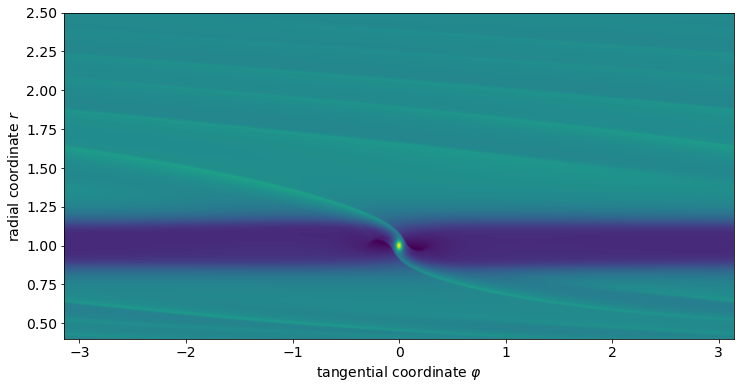

In [9]:
#display final gas density map
figsize = (12, 6)
extent = [P.xmin, P.xmax, P.ymin, P.ymax]
print ('extent = ', extent)
p = rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 1, figsize=figsize)
p = ax.imshow(np.log10(rho), origin='lower', aspect='auto', extent=extent)
p = ax.set_xlabel(r"tangential coordinate $\varphi$")
p = ax.set_ylabel(r"radial coordinate $r$")

[0, 2, 8, 16, 25, 50, 100]


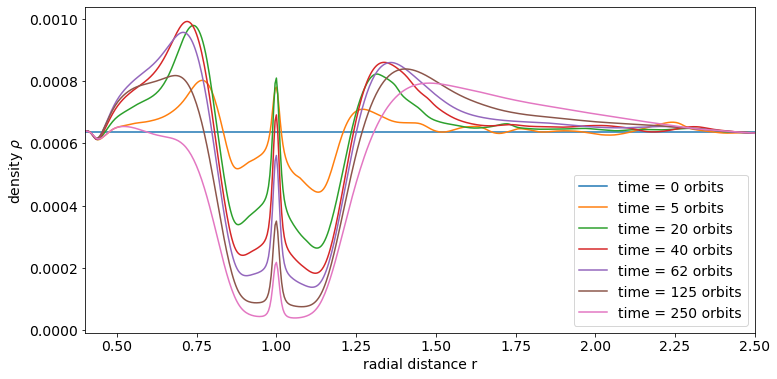

In [10]:
#plot radial cuts of azimuthally-averaged surface density
fig, ax = plt.subplots(1, 1, figsize=figsize)
Nt = N_times - 1
tidx = [0, int(Nt/50), int(Nt/12), int(Nt/6), int(Nt/4), int(Nt/2), Nt]
print (tidx)
twopi = 2.0*np.pi
for idx in tidx:
    label = 'time = ' + str(int(times[idx]/twopi)) + ' orbits'
    mean_rho = np.fromfile("gasdens{0:d}.dat".format(idx)).reshape(P.ny,P.nx).mean(axis=1)
    p = ax.plot(np.linspace(P.ymin,P.ymax,P.ny), mean_rho, label=label)
p = ax.set_xlim(P.ymin, P.ymax)
p = ax.set_xlabel('radial distance r')
p = ax.set_ylabel(r'density $\rho$')
p = ax.legend(loc='lower right')

In [11]:
#get mesh coordinates
xmin = np.loadtxt("domain_x.dat")       #face-centered coodinates
ymin = np.loadtxt("domain_y.dat")[3:-3] #face-centered coordinates. Ghosts are included, so we remove them from the array.
xc   = 0.5*(xmin[1:]+xmin[:-1])      #cell-centered
yc   = 0.5*(ymin[1:]+ymin[:-1])      #cell-centered
print (xmin[0], xmin[-1], ymin[0], ymin[-1])
print (P.xmin, P.xmax, P.ymin, P.ymax)

-3.141592653589793 3.141592653589793 0.4 2.5
-3.14159265358979 3.14159265358979 0.4 2.5


In [12]:
#extract gas velocities at final snapshot
n    = N_times - 1
vphi = np.fromfile("gasvx{0:d}.dat".format(n)).reshape(P.ny,P.nx)
vrad = np.fromfile("gasvy{0:d}.dat".format(n)).reshape(P.ny,P.nx)
#And center them
vphic = 0.5*(vphi[:-1,1:]+vphi[:-1,:-1])
vradc = 0.5*(vrad[1:,:-1]+vrad[:-1,:-1])

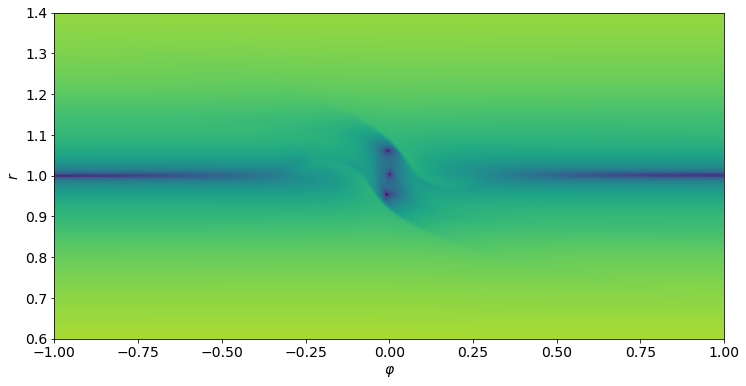

In [13]:
#heat map of gas velocity v
fig, ax = plt.subplots(1, 1, figsize=figsize)
v = np.sqrt(vphic**2+vradc**2)
p = ax.imshow(np.log10(v), origin='lower', aspect='auto', extent=[xc.min(),xc.max(),yc.min(),yc.max()])
p = ax.set_xlim(-1,1)
p = ax.set_ylim(0.6,1.4)
p = ax.set_xlabel(r"$\varphi$")
p = ax.set_ylabel(r"$r$")

In [14]:
#read all density snapshots
iter = 0
densities = []
while (True):
    try:
        density = np.fromfile("gasdens{0:d}.dat".format(iter), dtype='float64').reshape(P.ny, P.nx) 
    except:
        break
    densities += [density]
    iter += 1
log10_densities = [np.log10(d) for d in densities]
print ('number of snapshots = ', len(log10_densities))

number of snapshots =  101


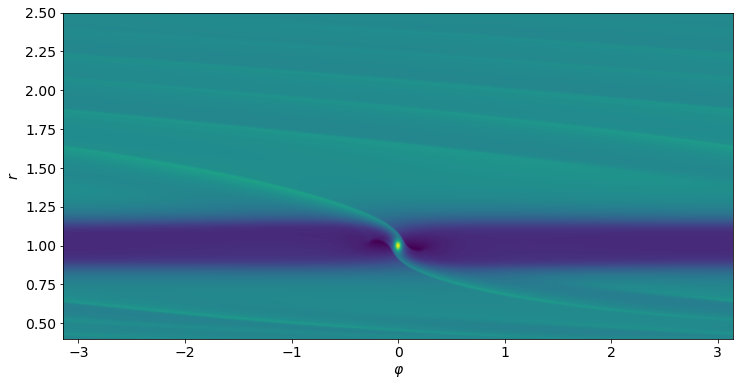

In [15]:
#display final density map
extent = [P.xmin, P.xmax, P.ymin, P.ymax]
fig, ax = plt.subplots(1, 1, figsize=figsize)
p = ax.imshow(log10_densities[-1], origin='lower', aspect='auto', extent=extent)
p = ax.set_xlabel(r"$\varphi$")
p = ax.set_ylabel(r"$r$")

In [16]:
#prepare animation of log10_densities, takes 5 minutes for Nx=1536, Ny=512 gridpoints and Nt=101 snapshots...
import time as tm
t0 = tm.time()
interval = 20; figsize = (10.0, 5.0)
interval = 20; figsize = (10.0, 5.0)
fig, ax = plt.subplots(1, 1, figsize=figsize)
plt.close()
imageList = log10_densities
indices = np.arange(0, len(imageList))
def update_frame(idx):
    im = imageList[idx]
    extent = [P.xmin, P.xmax, P.ymin, P.ymax]
    ax.imshow(im, origin='lower', aspect='auto', extent=extent)
    title = 'time = ' + str(int(times[idx]/twopi)) + ' orbits'
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(r'$\varphi$')
    ax.set_ylabel(r'$r$')
from matplotlib.animation import FuncAnimation
ani = FuncAnimation(fig, update_frame, frames=indices, interval=interval)
ani2jshtml = ani.to_jshtml()
t1 = tm.time()
animation_time_sec = t1 - t0
print ('animation_time_sec = ', animation_time_sec)

animation_time_sec =  302.85726737976074


In [17]:
#display animation of log10_densities
from IPython.display import HTML
HTML(ani2jshtml)

In [18]:
#generate r, phi axes and grids
phi_axis = np.linspace(P.xmin, P.xmax, P.nx)
r_axis = np.linspace(P.ymin, P.ymax, P.ny)
phi_grid, r_grid = np.meshgrid(phi_axis, r_axis)
phi_grid.shape, r_grid.shape, rho.shape

((512, 1536), (512, 1536), (512, 1536))

In [19]:
#x = radial distance from planet in units of Hill radii, y = tangential distance from planet in Hill units
#where Hill radius = planet's gravitational reach
m_planet = 0.001
R_hill = (m_planet/3.0)**(1.0/3.0)
print ('R_hill = ', R_hill)
x = (r_grid - 1.0)/R_hill
x_axis = (r_axis - 1.0)/R_hill
y = -r_grid*phi_grid/R_hill
y_axis = -1.0*phi_axis/R_hill

R_hill =  0.06933612743506348


im.shape =  (77, 78)


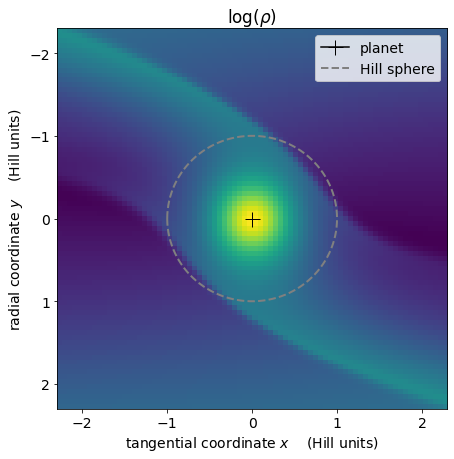

In [20]:
#display final density in/near planet's Hill sphere
im = np.log10(rho)
r_max = 2.3
idx = (np.abs(x_axis) < r_max)
im = im[idx, :]
idx = (np.abs(y_axis) < r_max)
im = im[:, idx]
print ('im.shape = ', im.shape)
extent = [-r_max, r_max, r_max, -r_max]
p = rcParams.update({'font.size': 14})
figsize = (7, 7)
fig, ax = plt.subplots(1, 1, figsize=figsize)
p = ax.imshow(im, origin='lower', aspect='auto', extent=extent)
p = ax.plot([0], [0], marker='+', markersize=15, color='black', label='planet')
xp = np.cos(phi_axis)
yp = np.sin(phi_axis)
p = ax.plot(xp, yp, color='gray', linestyle='dashed', linewidth=2, label='Hill sphere')
p = ax.set_title(r'log$(\rho)$')
p = ax.set_xlabel(r'tangential coordinate $x$    (Hill units)')
p = ax.set_ylabel(r'radial coordinate $y$    (Hill units)')
p = ax.legend()

In [21]:
#count number of grid mesh-points that sample the circumplanetary disk whose radius is ~1 Hill radius
delta_x = x_axis[1] - x_axis[0]
N_disk_samplings = 1.0/delta_x
print ('N_disk_samplings = ', N_disk_samplings)

N_disk_samplings =  16.87179100919838


In [22]:
#done 
print('execution time (min) = ', (tm.time() - clock_start)/60.0)

execution time (min) =  5.204006850719452
